# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand right now... let's visualize it


In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


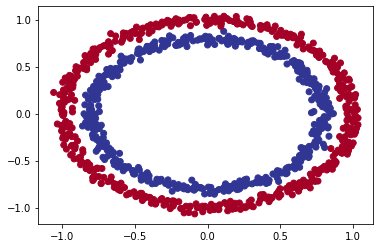

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How manny samples we're working
len(X),len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[4],y[4]

(array([ 0.44220765, -0.89672343]), 0)

## Steps in modeling

The steps in modeling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
# import TensorFlow
import tensorflow as tf
tf.__version__

'2.4.1'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5157


In [11]:
# Let's try and improve our model by trining for longer...
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(1),
   tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might wanst to add more layers or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model (this time 3 layers)
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100), # add 100 dense neurons
   tf.keras.layers.Dense(10), # add another layers with 10 neurons
   tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plot
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binarry classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binarry classification


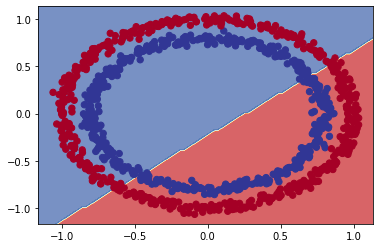

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

In [19]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

""" Error
# For out model to regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)
"""
"""
Epoch 1/100
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-19-7c72813a08b7> in <module>()
     14 
     15 # Fot out model to regression data
---> 16 model_3.fit(X_reg_train,y_reg_train,epochs=100)

9 frames
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)
    975           except Exception as e:  # pylint:disable=broad-except
    976             if hasattr(e, "ag_error_metadata"):
--> 977               raise e.ag_error_metadata.to_exception(e)
    978             else:
    979               raise

ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)
"""


'\nEpoch 1/100\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n<ipython-input-19-7c72813a08b7> in <module>()\n     14 \n     15 # Fot out model to regression data\n---> 16 model_3.fit(X_reg_train,y_reg_train,epochs=100)\n\n9 frames\n/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)\n    975           except Exception as e:  # pylint:disable=broad-except\n    976             if hasattr(e, "ag_error_metadata"):\n--> 977               raise e.ag_error_metadata.to_exception(e)\n    978             else:\n    979               raise\n\nValueError: in user code:\n\n    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *\n        return step_function(self, iterator)\n    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **\n    

Ohh wait... we compiled our model for a binary classigication problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Setup random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1),
])

# Compile the model, this time with regression-specific loss function
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0466 - mae: 269.0466
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 154.3798 - mae: 154.3798
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2721 - mae: 57.2721
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 72.9355 - mae: 72.9355
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 74.6527 - mae: 74.6527
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.1582 - mae: 51.1582
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7816 - mae: 46.7816
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3196 - mae: 45.3196
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2771 - mae: 43.2771
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.0550 - mae: 42.0550
Epoch 11/100
5/5 [==============================] - 0s 

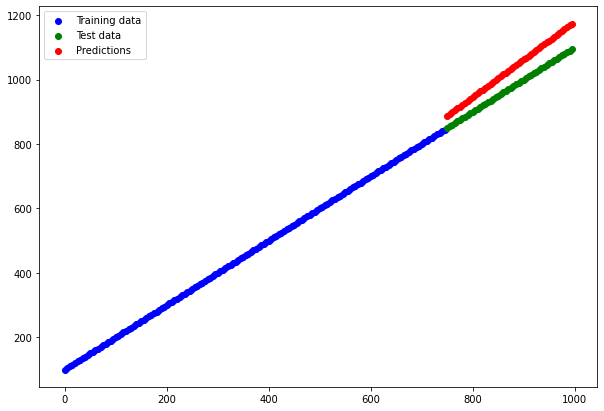

In [21]:
# Make predicitons with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7717 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9152 - accuracy: 0.4201
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.4180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.3986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5076 - accuracy: 0.4451
Epoch 11/

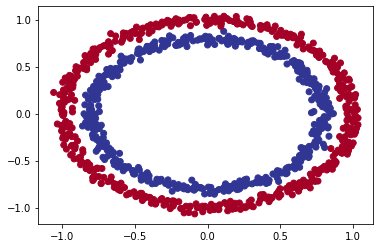

In [23]:
# Check out our data 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binarry classification


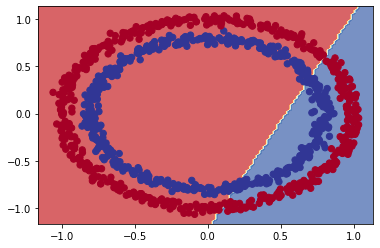

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build our first neural network with a non-linear activation function.

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu")
])

# Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fitting
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7717 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9152 - accuracy: 0.4201
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.4180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.3986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5076 - accuracy: 0.4451
Epoch 11/

In [26]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code

# Set random seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1),
])

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 2ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [27]:
# Evaluate
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binarry classification


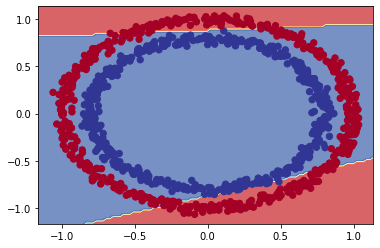

In [28]:
# How do our model prediction look
plot_decision_boundary(model_6,X,y)

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit model
history =model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [30]:
# Evaluate
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948005199432373, 0.9909999966621399]

doing binarry classification


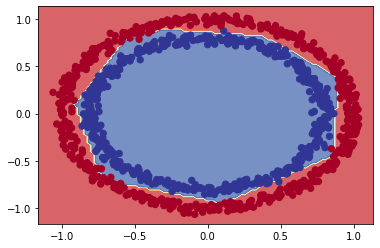

In [31]:
# Visualize
plot_decision_boundary(model_7,X,y)

In [32]:
# Create a toy tensor (similar to the data we pass in our model)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

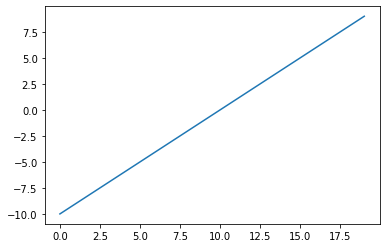

In [33]:
# Visualize our toy tensor
plt.plot(A);

In [34]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# USe the sigmoid on out toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

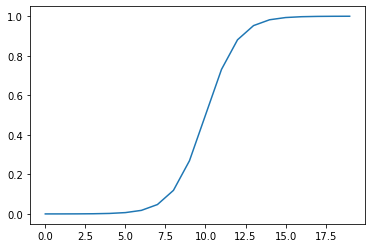

In [35]:
# Plot out toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [36]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

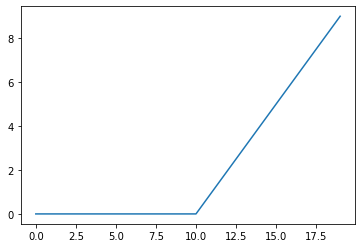

In [37]:
# Plot out toy tensor transformed by relu
plt.plot(relu(A))

In [38]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

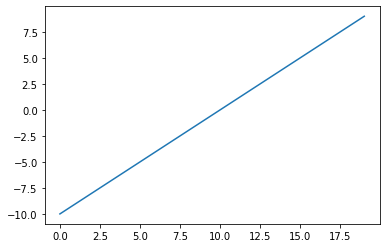

In [39]:
plt.plot(tf.keras.activations.linear(A))

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>